In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
%matplotlib inline
import csv

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
mushroom = pd.read_csv("newMushroom20noise.csv", sep=',')
mushroom.head()

,Unnamed: 0,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,0,4,0,3,4,3,1,5,1,...,-2,0,2,0,0,0,-4,4,0,p
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,2,0,1,1,1,e
2,2,1,0,2,1,2,0,0,1,1,...,0,0,1,0,2,0,1,1,2,e
3,3,0,1,2,1,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,p
4,4,0,0,3,0,3,0,1,1,0,...,0,0,1,0,2,1,1,2,1,e


In [4]:
appendicitis = pd.read_csv("appendicitis20noise.csv", sep=',')
appendicitis.head()

,Unnamed: 0,At1,At2,At3,At4,At5,At6,At7,Class
0,0,-1.21166,2.112021,0.704779,-0.990817,1.460213,1.012297,1.09874,1
1,1,0.45800,0.714000,0.468000,0.111000,0.102000,0.741000,0.43600,1
2,2,0.10200,0.518000,0.111000,0.056000,0.022000,0.506000,0.08600,1
3,3,0.18700,0.196000,0.105000,0.056000,0.029000,0.133000,0.08500,1
4,4,0.23600,0.804000,0.289000,0.111000,0.066000,0.756000,0.24100,1


In [5]:
Glass = pd.read_csv("glass20noise.csv")
Glass.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,0,0.621854,13.632827,4.526618,1.905051,69.194205,0.206199,9.620259,1.369414,-1.124406,1
1,1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,3,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1
4,4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1


In [6]:
print(mushroom.shape)
print(mushroom.groupby('Class').size())

(5644, 24)
Class
e    3488
p    2156
dtype: int64


In [7]:
print(appendicitis.shape)
print(appendicitis.groupby('Class').size())

(106, 9)
Class
0    85
1    21
dtype: int64


In [8]:
print(Glass.shape)
print(Glass.groupby("Class").size())

(214, 11)
Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [9]:
data_mushroom = mushroom.iloc[:,1:23]
labels_mushroom = mushroom.iloc[:,23].astype(str)

In [10]:
data_appendicitis = appendicitis.iloc[:,1:8]
labels_appendicitis = appendicitis.iloc[:,8].astype(str)

In [11]:
data_Glass = Glass.iloc[:,1:10]
labels_Glass = Glass.iloc[:,10].astype(str)

In [12]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

## Decision Tree for Mushroom Dataset

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1765
           p       0.80      0.84      0.82      1057

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.86      0.86      2822
weighted avg       0.87      0.86      0.87      2822

accuracy:  0.8646350106307583


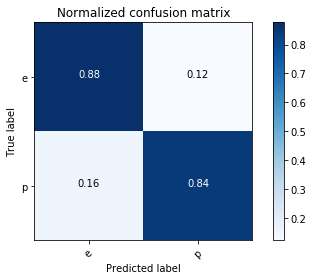

              precision    recall  f1-score   support

           e       0.88      0.90      0.89      1723
           p       0.84      0.81      0.83      1099

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8660524450744153


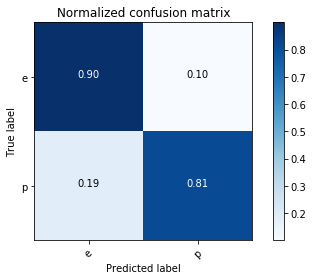

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1703
           p       0.82      0.86      0.84      1119

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.87      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


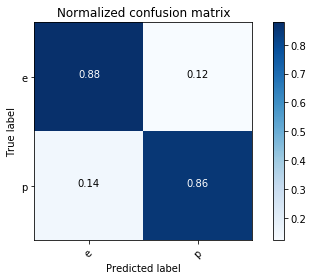

              precision    recall  f1-score   support

           e       0.90      0.91      0.90      1785
           p       0.84      0.83      0.83      1037

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.87      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8766832034018427


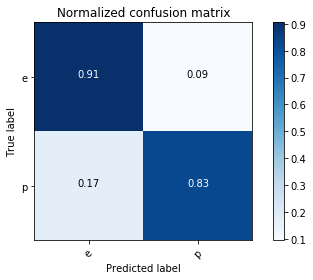

              precision    recall  f1-score   support

           e       0.90      0.90      0.90      1759
           p       0.84      0.83      0.83      1063

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8731396172927002


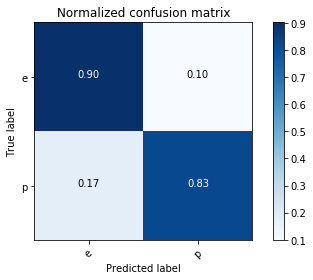

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1729
           p       0.82      0.84      0.83      1093

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8639262934089298


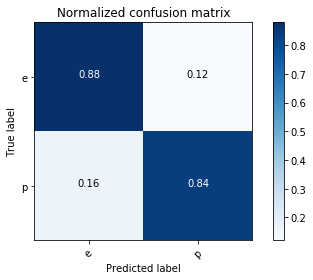

              precision    recall  f1-score   support

           e       0.90      0.91      0.90      1753
           p       0.85      0.83      0.84      1069

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.87      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8791637136782424


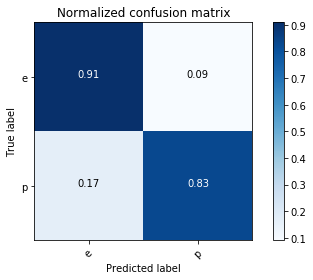

              precision    recall  f1-score   support

           e       0.90      0.89      0.90      1735
           p       0.83      0.84      0.84      1087

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.87      0.87      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8731396172927002


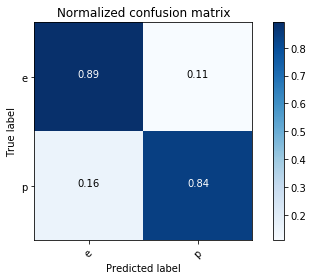

              precision    recall  f1-score   support

           e       0.90      0.89      0.89      1727
           p       0.82      0.85      0.84      1095

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.87      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8710134656272147


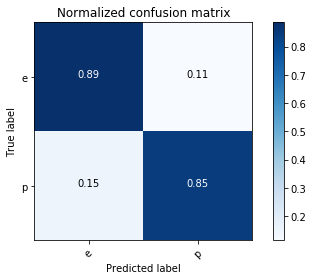

              precision    recall  f1-score   support

           e       0.89      0.89      0.89      1761
           p       0.82      0.82      0.82      1061

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8656980864635011


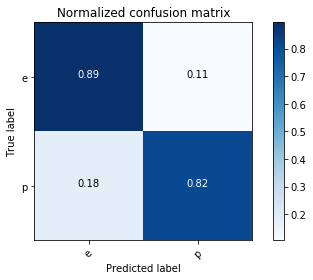

In [13]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data_mushroom.iloc[train_index], data_mushroom.iloc[test_index]
        y_train, y_test = labels_mushroom[train_index], labels_mushroom[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Appendicitis Dataset

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.53      0.67      0.59        12

   micro avg       0.79      0.79      0.79        53
   macro avg       0.71      0.75      0.73        53
weighted avg       0.81      0.79      0.80        53

accuracy:  0.7924528301886793


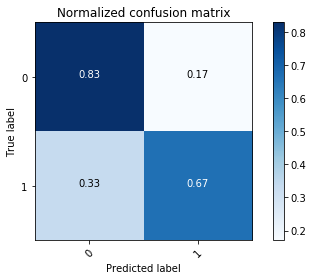

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.36      0.44      0.40         9

   micro avg       0.77      0.77      0.77        53
   macro avg       0.62      0.64      0.63        53
weighted avg       0.79      0.77      0.78        53

accuracy:  0.7735849056603774


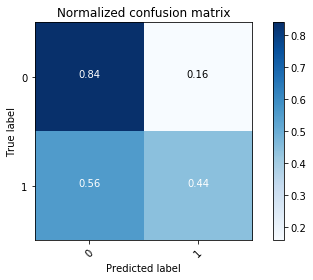

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.50      0.75      0.60         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.73      0.81      0.75        53
weighted avg       0.88      0.85      0.86        53

accuracy:  0.8490566037735849


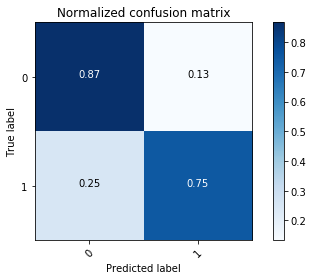

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.36      0.38      0.37        13

   micro avg       0.68      0.68      0.68        53
   macro avg       0.58      0.58      0.58        53
weighted avg       0.69      0.68      0.68        53

accuracy:  0.6792452830188679


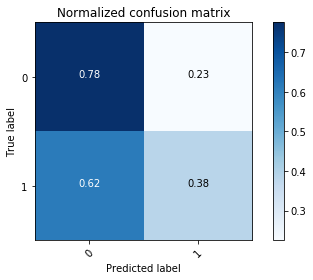

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.60      0.67      0.63         9

   micro avg       0.87      0.87      0.87        53
   macro avg       0.77      0.79      0.78        53
weighted avg       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


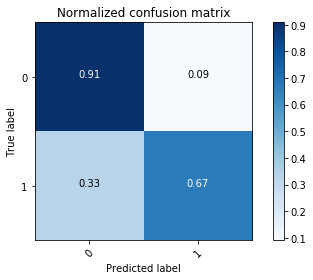

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.70      0.58      0.64        12

   micro avg       0.85      0.85      0.85        53
   macro avg       0.79      0.76      0.77        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


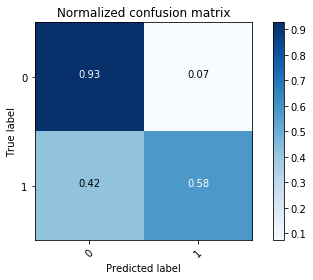

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        45
           1       0.24      0.50      0.32         8

   micro avg       0.68      0.68      0.68        53
   macro avg       0.56      0.61      0.56        53
weighted avg       0.79      0.68      0.72        53

accuracy:  0.6792452830188679


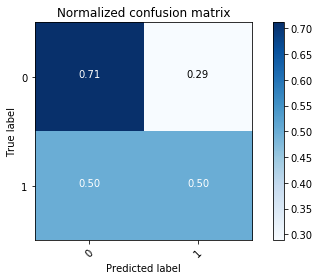

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.50      0.54      0.52        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.67      0.68      0.68        53
weighted avg       0.76      0.75      0.76        53

accuracy:  0.7547169811320755


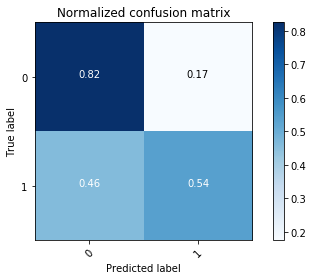

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.33      0.56      0.42         9

   micro avg       0.74      0.74      0.74        53
   macro avg       0.61      0.66      0.62        53
weighted avg       0.80      0.74      0.76        53

accuracy:  0.7358490566037735


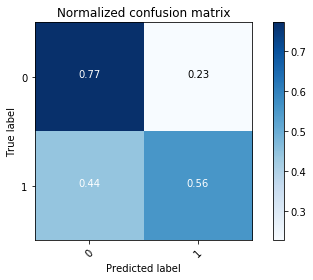

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.38      0.50      0.43        12

   micro avg       0.70      0.70      0.70        53
   macro avg       0.61      0.63      0.61        53
weighted avg       0.73      0.70      0.71        53

accuracy:  0.6981132075471698


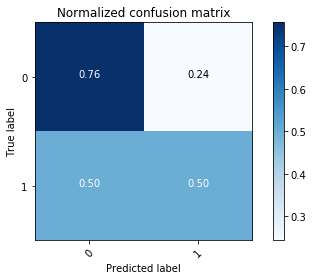

In [14]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data_appendicitis.iloc[train_index], data_appendicitis.iloc[test_index]
        y_train, y_test = labels_appendicitis[train_index], labels_appendicitis[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Glass Dataset

              precision    recall  f1-score   support

           6       0.57      0.66      0.61        35
           5       0.53      0.57      0.55        35
           1       0.29      0.18      0.22        11
           7       0.50      0.60      0.55         5
           3       0.25      0.33      0.29         3
           2       0.83      0.56      0.67        18

   micro avg       0.55      0.55      0.55       107
   macro avg       0.50      0.48      0.48       107
weighted avg       0.56      0.55      0.55       107

accuracy:  0.5514018691588785


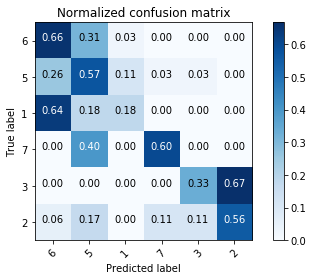

              precision    recall  f1-score   support

           6       0.73      0.69      0.71        35
           5       0.71      0.54      0.61        41
           1       0.33      0.50      0.40         6
           7       0.46      0.75      0.57         8
           3       0.60      0.50      0.55         6
           2       0.62      0.91      0.74        11

   micro avg       0.64      0.64      0.64       107
   macro avg       0.58      0.65      0.60       107
weighted avg       0.66      0.64      0.64       107

accuracy:  0.6355140186915887


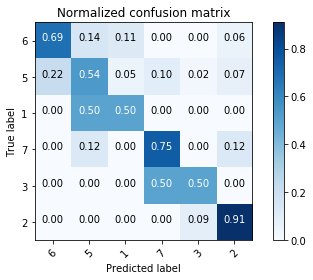

              precision    recall  f1-score   support

           6       0.59      0.62      0.61        32
           5       0.51      0.64      0.57        33
           1       0.45      0.45      0.45        11
           7       0.60      0.50      0.55         6
           3       0.00      0.00      0.00         5
           2       0.93      0.65      0.76        20

   micro avg       0.58      0.58      0.58       107
   macro avg       0.51      0.48      0.49       107
weighted avg       0.59      0.58      0.58       107

accuracy:  0.5794392523364486


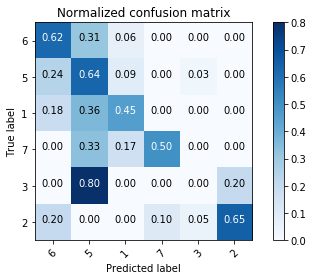

              precision    recall  f1-score   support

           6       0.64      0.71      0.67        38
           5       0.70      0.53      0.61        43
           1       0.20      0.17      0.18         6
           7       0.57      0.57      0.57         7
           3       0.75      0.75      0.75         4
           2       0.56      1.00      0.72         9

   micro avg       0.63      0.63      0.63       107
   macro avg       0.57      0.62      0.58       107
weighted avg       0.63      0.63      0.62       107

accuracy:  0.6261682242990654


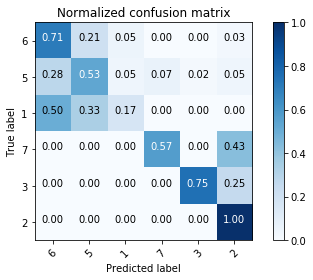

              precision    recall  f1-score   support

           6       0.69      0.69      0.69        35
           5       0.55      0.54      0.55        39
           1       0.50      0.22      0.31         9
           7       0.25      0.33      0.29         6
           3       0.22      0.40      0.29         5
           2       0.54      0.54      0.54        13

   micro avg       0.54      0.54      0.54       107
   macro avg       0.46      0.45      0.44       107
weighted avg       0.56      0.54      0.54       107

accuracy:  0.5420560747663551


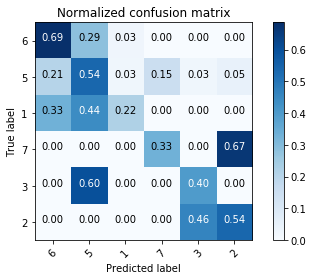

              precision    recall  f1-score   support

           6       0.59      0.49      0.53        35
           5       0.57      0.65      0.61        37
           1       0.08      0.12      0.10         8
           7       0.50      0.29      0.36         7
           3       0.14      0.25      0.18         4
           2       0.92      0.75      0.83        16

   micro avg       0.53      0.53      0.53       107
   macro avg       0.47      0.42      0.44       107
weighted avg       0.57      0.53      0.55       107

accuracy:  0.5327102803738317


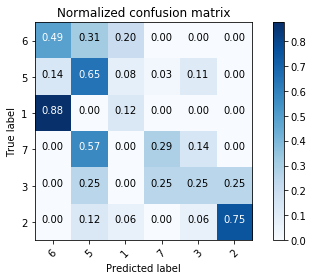

              precision    recall  f1-score   support

           6       0.86      0.60      0.71        40
           5       0.64      0.73      0.68        37
           1       0.50      0.50      0.50         8
           7       0.40      0.80      0.53         5
           3       0.43      0.75      0.55         4
           2       0.75      0.69      0.72        13

   micro avg       0.66      0.66      0.66       107
   macro avg       0.60      0.68      0.61       107
weighted avg       0.71      0.66      0.67       107

accuracy:  0.6635514018691588


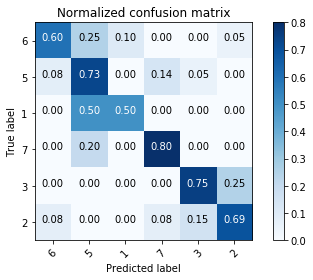

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           6       0.53      0.77      0.63        30
           5       0.62      0.59      0.61        39
           1       0.20      0.22      0.21         9
           7       0.50      0.25      0.33         8
           3       0.00      0.00      0.00         5
           2       0.92      0.75      0.83        16

   micro avg       0.58      0.58      0.58       107
   macro avg       0.46      0.43      0.43       107
weighted avg       0.57      0.58      0.56       107

accuracy:  0.5794392523364486


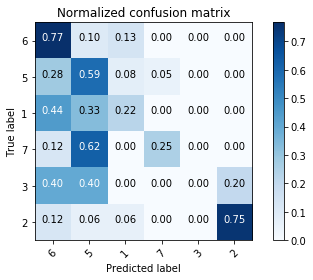

              precision    recall  f1-score   support

           6       0.61      0.62      0.62        32
           5       0.71      0.57      0.63        44
           1       0.50      0.83      0.62         6
           7       0.50      0.33      0.40         6
           3       1.00      0.75      0.86         4
           2       0.64      0.93      0.76        15

   micro avg       0.64      0.64      0.64       107
   macro avg       0.66      0.67      0.65       107
weighted avg       0.66      0.64      0.64       107

accuracy:  0.6448598130841121


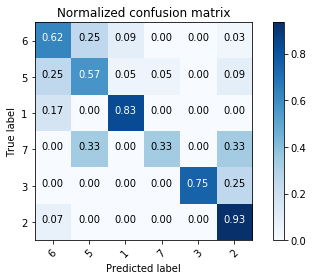

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           6       0.69      0.58      0.63        38
           5       0.59      0.72      0.65        32
           1       0.25      0.27      0.26        11
           7       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         5
           2       0.67      0.86      0.75        14

   micro avg       0.59      0.59      0.59       107
   macro avg       0.45      0.48      0.46       107
weighted avg       0.57      0.59      0.57       107

accuracy:  0.5887850467289719


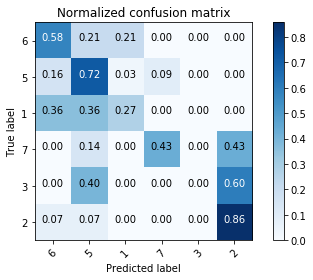

In [15]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(Glass):
        X_train, X_test = data_Glass.iloc[train_index], data_Glass.iloc[test_index]
        y_train, y_test = labels_Glass[train_index], labels_Glass[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [16]:
with open("accDTWith20Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)